<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/TICTACTOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df1 = pd.read_excel("3TASS.xlsx")

In [ ]:
df1

,topleftsquare,topmiddlesquare,toprightsquare,middleleftsquare,middlemiddlesquare,middlerightsquare,bottomleftsquare,bottommiddlesquare,bottomrightsquare,Winner
0,0,0,0,0,1,1,1,0,1,123Winner
1,1,1,0,1,0,0,0,0,1,357Winner
2,1,1,0,0,1,1,0,0,1,159Winner
3,1,1,0,0,0,1,0,1,0,357Winner
4,0,1,1,1,0,1,0,1,0,159Winner
...,...,...,...,...,...,...,...,...,...,...
9994,0,1,0,0,1,1,1,1,0,258Winner
9995,1,0,0,0,1,0,1,0,0,369Winner
9996,1,1,0,0,1,1,1,1,0,258Winner
9997,0,1,0,1,1,1,0,0,1,456Winner


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
df_order_items2=df1
# Malzeme ve Tanım özelliklerini sayısal değerlere dönüştür
le = LabelEncoder()
df_order_items2["Winner"] = le.fit_transform(df_order_items2["Winner"])
# Renk Kodu özelliğini tahmin etmek için kullanacağımız sütun
y=df_order_items2["Winner"]

# Tahmin etmek istediğimiz özellik hariç diğer tüm sütunları al
X = df_order_items2.drop("Winner", axis=1)

# Eğitim ve test setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from keras.layers import Dropout
# Yapay sinir ağı modelini oluştur
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) # Dropout katmanı ekle
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) # Dropout katmanı ekle
model.add(Dense(len(le.classes_), activation='softmax'))

# Modeli derle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
# Modeli eğit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10)

Epoch 1/5
900/900 [==============================] - 4s 4ms/step - loss: 0.9652 - accuracy: 0.7189 - val_loss: 0.1512 - val_accuracy: 0.9670
Epoch 2/5
900/900 [==============================] - 2s 2ms/step - loss: 0.1635 - accuracy: 0.9656 - val_loss: 0.0362 - val_accuracy: 0.9990
Epoch 3/5
900/900 [==============================] - 2s 2ms/step - loss: 0.0762 - accuracy: 0.9832 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4/5
900/900 [==============================] - 2s 2ms/step - loss: 0.0442 - accuracy: 0.9910 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 5/5
900/900 [==============================] - 2s 2ms/step - loss: 0.0289 - accuracy: 0.9940 - val_loss: 0.0017 - val_accuracy: 1.0000


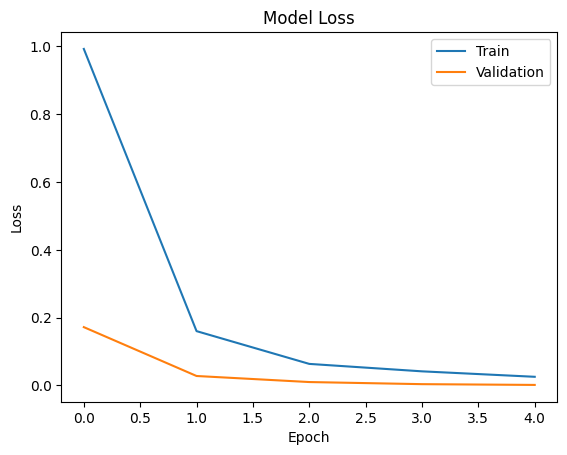

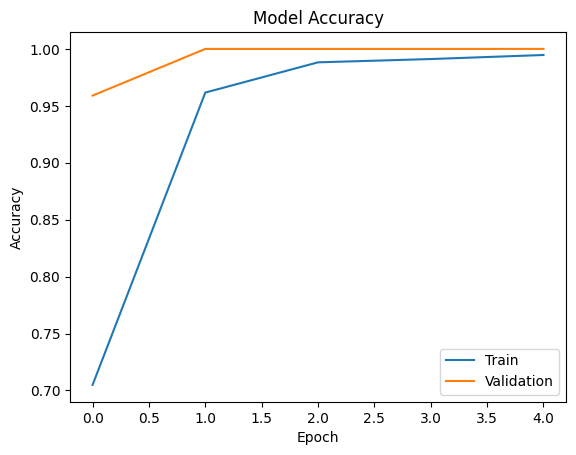

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıp (loss) değerlerinin grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Eğitim ve doğrulama doğruluk (accuracy) değerlerinin grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

32/32 [==============================] - 0s 1ms/step


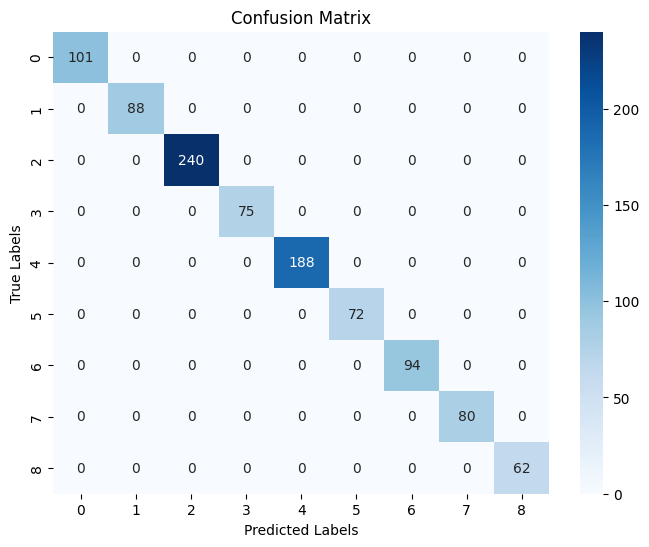

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")

# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()


In [30]:
df2 = pd.read_excel("Kitap1.xlsx")

In [41]:
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# df_order_items'tan rastgele bir örnek seç
sample = df2.sample()
print(sample)
# Gerçek renk kodunu al
Gercek_kazanan_kod = sample["Winner"].values[0]

# Tahmini renk kodunu yap
tahmin = model.predict(sample.drop("Winner", axis=1))[0].argmax()
# Tahmin edilen sınıfın etiketini al
tahmin_sinifi = le.inverse_transform([tahmin])[0]
# Tahmin ve gerçek renk kodunu yazdır
print("Gerçek Kazanan Kod:", Gercek_kazanan_kod)
print("Tahmin Edilen Kazanan Sınıf:", tahmin_sinifi)

    X1  X2  X3  X4  X5  X6  X7  X8  X9     Winner
15   0   1   1   1   0   1   0   1   1  369Winner
1/1 [==============================] - 0s 23ms/step
Gerçek Kazanan Kod: 369Winner
Tahmin Edilen Kazanan Sınıf: 369Winner
